In [1]:
import gzip
import struct
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score

1. Перших 2 байти завжди порожні тому ми їх пропускаємо зчитуючи >H тип unsigned short який займає 2 байти

2. 3-ій байт вказує на тип даних
  * 0x08: unsigned byte 
  * 0x09: signed byte 
  * 0x0B: short (2 bytes) 
  * 0x0C: int (4 bytes) 
  * 0x0D: float (4 bytes) 
  * 0x0E: double (8 bytes)
  
3. Наступний байт вказує кількість вимірів матриці

4. Далі послідовно для кожного виміру вказано його розмір як 4-байтове ціле число. Тобто, починаючи з п’ятого байту, три групи по 4 байти вказують на розмірність тривимірної матриці, а саме

In [2]:
print('Labels shape')

with gzip.open('dataset/train-labels-idx1-ubyte.gz', 'rb') as f:
    print(struct.unpack('>HBB', f.read(4)))
    print(struct.unpack('>I', f.read(4)))

print('\nImages shape')
with gzip.open('dataset/train-images-idx3-ubyte.gz', 'rb') as f:
    print(struct.unpack('>HBB', f.read(4)))
    print(struct.unpack('>III', f.read(12)))

Labels shape
(0, 8, 1)
(60000,)

Images shape
(0, 8, 3)
(60000, 28, 28)


In [3]:
# script for reading MNIST file format
def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [4]:
raw_train = read_idx('dataset/train-images-idx3-ubyte.gz')
X_train = raw_train.reshape(60000, 28 * 28)
y_train = read_idx('dataset/train-labels-idx1-ubyte.gz')

raw_test = read_idx('dataset/t10k-images-idx3-ubyte.gz')
X_test = raw_test.reshape(10000, 28 * 28)
y_test = read_idx('dataset/t10k-labels-idx1-ubyte.gz')

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn.model_selection import cross_val_score

parameters = [100, 200, 300, 400]
scores = []
for parameter in parameters:
    clf = RandomForestClassifier(n_estimators=parameter, n_jobs=-1, verbose=True)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    scores.append(cv_scores.mean())
    print(scores[-1])

[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jo

0.9666668114992445


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.3min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.2min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.1min finished
[Parallel(n_jobs=2)]: Done  46 

0.9674166448860332


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.8min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.6min finished
[Parallel(n_jobs=2)]: Done  46 

0.9681334005024727


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  6.3min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  6.2min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  6.3min finished
[Parallel(n_jobs=2)]: Done  46 

0.9680332546882161


[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    4.6s finished


Text(0,0.5,'Відсоток правильних відповідей')

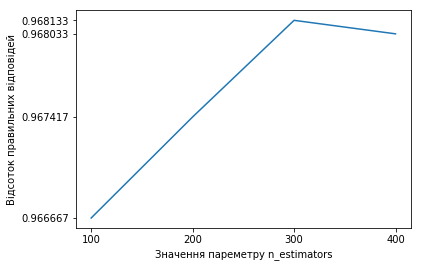

In [24]:
plt.plot(parameters, scores)
plt.xticks(parameters)
plt.yticks(scores)
plt.xlabel('Значення пареметру n_estimators')
plt.ylabel('Відсоток правильних відповідей')

In [8]:
%time clf = RandomForestClassifier(n_estimators=300, n_jobs=-1, verbose=True).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min


CPU times: user 4min 36s, sys: 1.29 s, total: 4min 37s
Wall time: 2min 25s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


In [9]:
# save classifier
from sklearn.externals import joblib
joblib.dump(clf, 'app/classifiers/random-forest.pkl') 

['app/classifiers/random-forest.pkl']

In [11]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    4.2s finished


0.9706

In [19]:
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Нормалізована матриця помилок")
    else:
        print('Матриця помилок, без нормалізації')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Вірний клас')
    plt.xlabel('Передбачений клас')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

Матриця помилок, без нормалізації
[[ 970    0    0    0    0    2    2    1    4    1]
 [   0 1122    3    3    0    2    3    1    1    0]
 [   5    1  999    6    2    0    4    8    7    0]
 [   0    0    9  972    0    8    0    9    8    4]
 [   1    0    1    0  958    0    5    0    3   14]
 [   3    0    1   12    4  859    4    1    5    3]
 [   6    3    0    0    3    3  941    0    2    0]
 [   1    2   20    1    2    0    0  990    1   11]
 [   3    0    6    8    4    4    5    4  933    7]
 [   6    6    3    8   12    2    1    4    5  962]]


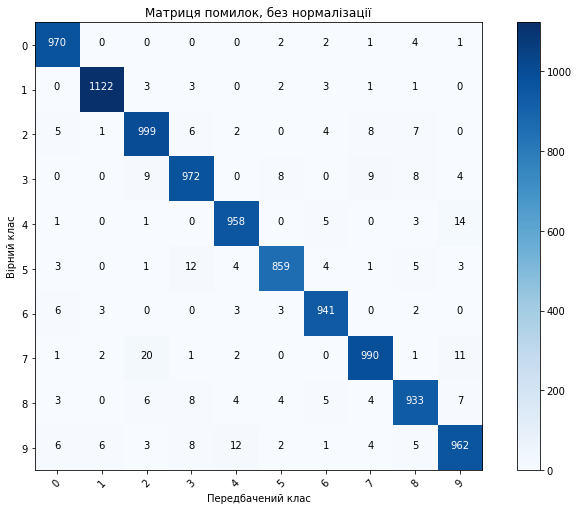

In [21]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 7))
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                      title='Матриця помилок, без нормалізації')

Нормалізована матриця помилок
[[9.90e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.04e-03 2.04e-03 1.02e-03
  4.08e-03 1.02e-03]
 [0.00e+00 9.89e-01 2.64e-03 2.64e-03 0.00e+00 1.76e-03 2.64e-03 8.81e-04
  8.81e-04 0.00e+00]
 [4.84e-03 9.69e-04 9.68e-01 5.81e-03 1.94e-03 0.00e+00 3.88e-03 7.75e-03
  6.78e-03 0.00e+00]
 [0.00e+00 0.00e+00 8.91e-03 9.62e-01 0.00e+00 7.92e-03 0.00e+00 8.91e-03
  7.92e-03 3.96e-03]
 [1.02e-03 0.00e+00 1.02e-03 0.00e+00 9.76e-01 0.00e+00 5.09e-03 0.00e+00
  3.05e-03 1.43e-02]
 [3.36e-03 0.00e+00 1.12e-03 1.35e-02 4.48e-03 9.63e-01 4.48e-03 1.12e-03
  5.61e-03 3.36e-03]
 [6.26e-03 3.13e-03 0.00e+00 0.00e+00 3.13e-03 3.13e-03 9.82e-01 0.00e+00
  2.09e-03 0.00e+00]
 [9.73e-04 1.95e-03 1.95e-02 9.73e-04 1.95e-03 0.00e+00 0.00e+00 9.63e-01
  9.73e-04 1.07e-02]
 [3.08e-03 0.00e+00 6.16e-03 8.21e-03 4.11e-03 4.11e-03 5.13e-03 4.11e-03
  9.58e-01 7.19e-03]
 [5.95e-03 5.95e-03 2.97e-03 7.93e-03 1.19e-02 1.98e-03 9.91e-04 3.96e-03
  4.96e-03 9.53e-01]]


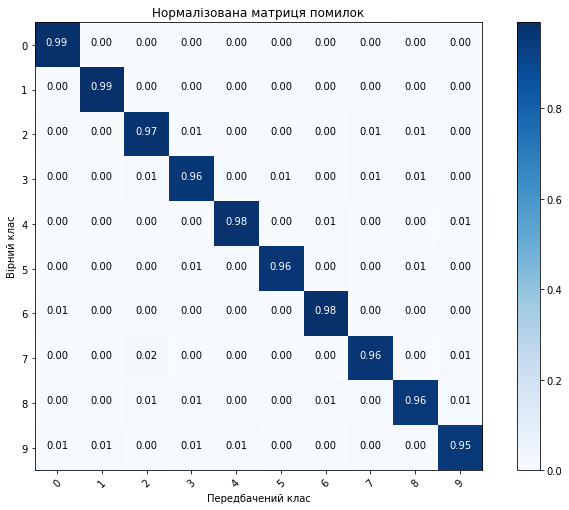

In [22]:
# Plot normalized confusion matrix
plt.figure(figsize=(10, 7))
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], normalize=True,
                      title='Нормалізована матриця помилок')

In [15]:
plt.show()

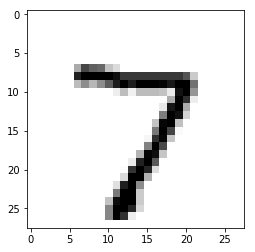

In [16]:
plt.imshow(X_test[0].reshape(28, 28), cmap="binary")